## test para obtener weather data

In [1]:
%matplotlib inline
import sys
from pathlib import Path
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = Path.cwd() / "data"
import pcse
print("This notebook was built with:")
print(f"python version: {sys.version}")
print(f"PCSE version: {pcse.__version__}")

print(data_dir)

from pcse.fileinput import ExcelWeatherDataProvider

weatherfile = data_dir / "elroble_2000to2024.xlsx"
weatherdataprovider = ExcelWeatherDataProvider(weatherfile)
print(weatherdataprovider)

This notebook was built with:
python version: 3.10.15 | packaged by conda-forge | (main, Oct 16 2024, 01:15:49) [MSC v.1941 64 bit (AMD64)]
PCSE version: 6.0.8
d:\OneDrive\CLISCO\code\desarrollo\deborahgaso\Cropmodels\runflies\data
Importing from `pcse.fileinput` is deprecated and will be removed. Use `pcse.input` instead.


PCSEError: Cannot find weather file at: d:\OneDrive\CLISCO\code\desarrollo\deborahgaso\Cropmodels\runflies\data\elroble_2000to2024.xlsx

In [2]:
from pcse.input import NASAPowerWeatherDataProvider

weatherdata = NASAPowerWeatherDataProvider(longitude=-57.079, latitude=-33.492)
print(weatherdata)

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\javie\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\javie\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.la

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER CERES/MERRA2 Native Resolution Daily Data
----Site characteristics----
Elevation:  111.5
Latitude:  -33.492
Longitude: -57.079
Data available for 1984-01-01 - 2024-11-15
Number of missing days: 3



In [12]:
df = pd.DataFrame(weatherdata.export()).set_index("DAY")
#df.info()
df.tail()

,LAT,LON,ELEV,IRRAD,TMIN,TMAX,VAP,RAIN,E0,ES0,ET0,WIND,TEMP
DAY,,,,,,,,,,,,,
2024-11-11,-33.492,-57.079,111.55,24680000.0,10.87,23.46,12.697169,1.260,0.597155,0.531472,0.495798,3.59,18.09
2024-11-12,-33.492,-57.079,111.55,29580000.0,8.32,22.86,10.604111,0.001,0.633774,0.557488,0.512942,2.27,15.82
2024-11-13,-33.492,-57.079,111.55,27100000.0,10.61,26.05,12.230342,0.000,0.631090,0.557370,0.521180,1.80,18.23
2024-11-14,-33.492,-57.079,111.55,28670000.0,11.28,27.15,14.371520,0.000,0.712303,0.633064,0.566306,2.60,19.60
2024-11-15,-33.492,-57.079,111.55,30050000.0,13.92,29.44,17.329885,0.000,0.806933,0.720402,0.631855,3.20,21.86


C:\Users\javie\AppData\Local\Temp\ipykernel_57372\615487581.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_year'] = df_filtered.index.dayofyear


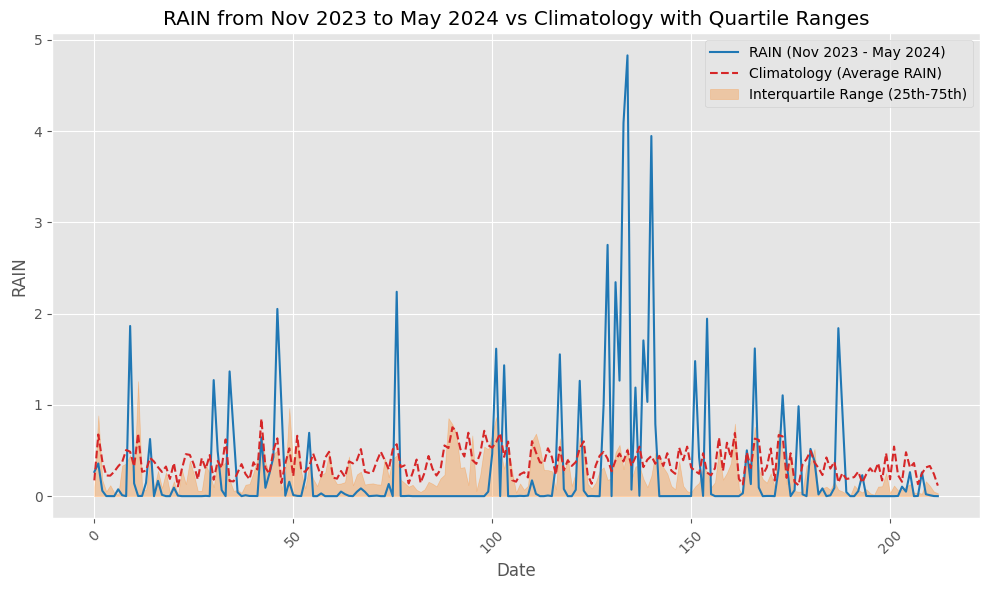

In [18]:
#get 2023/2024 irrad 
## nov-may
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded

# Choose the variable to plot (change 'VAP' to any other column like 'TMIN', 'TMAX', etc.)
variable = 'RAIN'  # Change this to any column name, e.g., 'TMIN', 'TMAX', etc.

# Step 1: Ensure that the index is in datetime format
df.index = pd.to_datetime(df.index)

# Step 2: Filter the DataFrame for the desired date range: Nov 2023 to May 2024
df_filtered = df.loc['2023-11-01':'2024-05-31']

# Step 3: Calculate the climatology (mean for each day of the year, across all years)
df['day_of_year'] = df.index.dayofyear  # Add a column for the day of the year
climatology = df.groupby('day_of_year')[variable].mean()  # Average for each day of the year

# Step 4: Calculate the 25th and 75th percentiles for each day of the year
q25 = df.groupby('day_of_year')[variable].quantile(0.25)  # 25th percentile
q75 = df.groupby('day_of_year')[variable].quantile(0.75)  # 75th percentile

# Step 5: Get the day-of-year for the filtered data
df_filtered['day_of_year'] = df_filtered.index.dayofyear

# Step 6: Merge the climatology with the filtered data by day of year (with a suffix)
df_filtered = df_filtered.merge(climatology, on='day_of_year', suffixes=('', '_clim'))

# Step 7: Merge the 25th percentile with the filtered data by day of year (with a suffix)
df_filtered = df_filtered.merge(q25, on='day_of_year', suffixes=('', '_q25'))

# Step 8: Merge the 75th percentile with the filtered data by day of year (with a suffix)
df_filtered = df_filtered.merge(q75, on='day_of_year', suffixes=('', '_q75'))

# Step 9: Plot the selected variable, climatology, and quartile ranges
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered[variable], label=f'{variable} (Nov 2023 - May 2024)', color='tab:blue')
plt.plot(df_filtered.index, df_filtered[f'{variable}_clim'], label=f'Climatology (Average {variable})', color='tab:red', linestyle='--')

# Step 10: Add shaded area for the interquartile range (25th to 75th percentiles)
plt.fill_between(df_filtered.index, df_filtered[f'{variable}_q25'], df_filtered[f'{variable}_q75'], color='tab:orange', alpha=0.3, label=f'Interquartile Range (25th-75th)')

# Step 11: Add title and labels
plt.title(f'{variable} from Nov 2023 to May 2024 vs Climatology with Quartile Ranges')
plt.xlabel('Date')
plt.ylabel(f'{variable}')

# Step 12: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Step 13: Add a legend
plt.legend()

# Step 14: Display the plot
plt.tight_layout()
plt.show()

